# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def generatePredictVsTruePlot(response, response_pred, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.scatter(response, response_pred, color = "blue")
    plt.plot(response, response, 'w-', linewidth = 1)
    plt.xlabel("True values of the Response Variable (Train)")
    plt.ylabel("Predicted values of the Response Variable (Train)")
    plt.show()
    
def generateRandomForestClassifier(data, predictor, response, n_estimators, depth):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Classifier object
    random_forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    # Print the Train and Test Classification Accuracy
    print("Train Classification Accuracy \t:", random_forest.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", random_forest.score(predictor_test, response_test))

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateRandomForestRegressor(data, predictor, response, n_estimators, depth):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Regressor object
    random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)
    
    # Print the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_train, response_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_train_pred))
    print()

    # Print the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_test, response_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_test_pred))
    print()

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}
   

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.43070717]
Coefficients 	: a =  [[0.24602626]]
R^2 0.006360927193053922


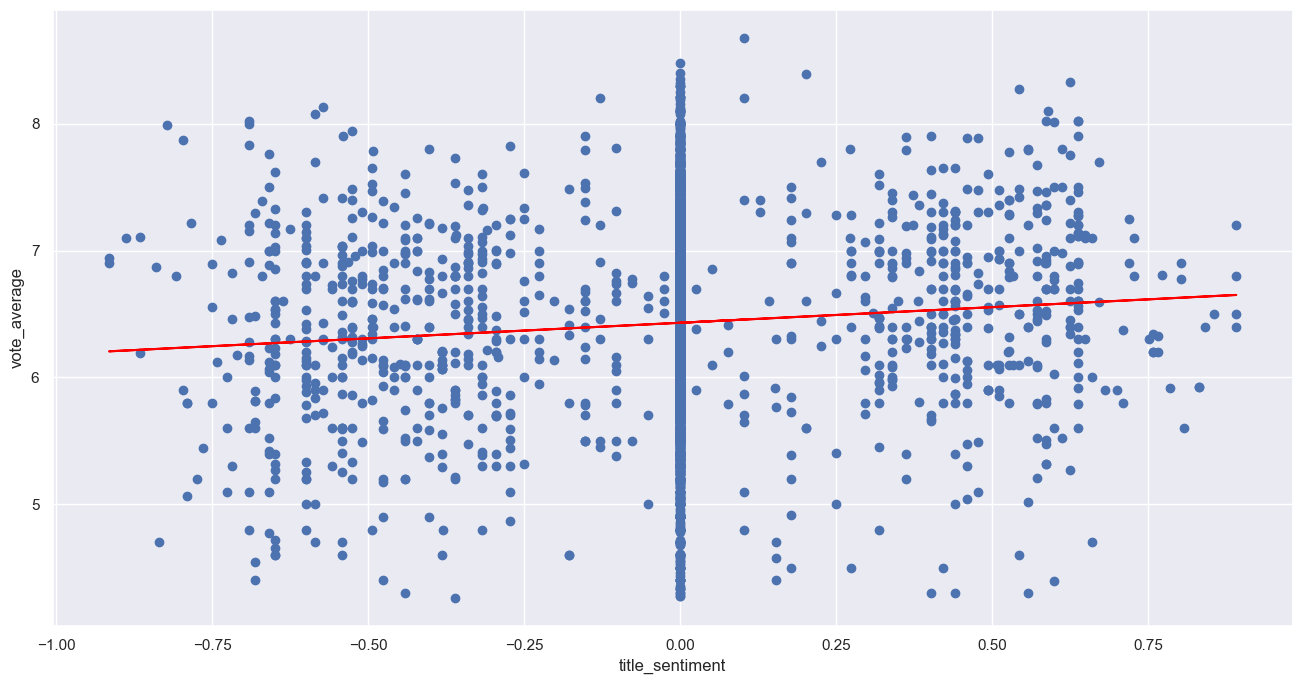

Intercept 	: b =  [6.42841122]
Coefficients 	: a =  [[0.1061344]]
R^2 0.007891414183643142


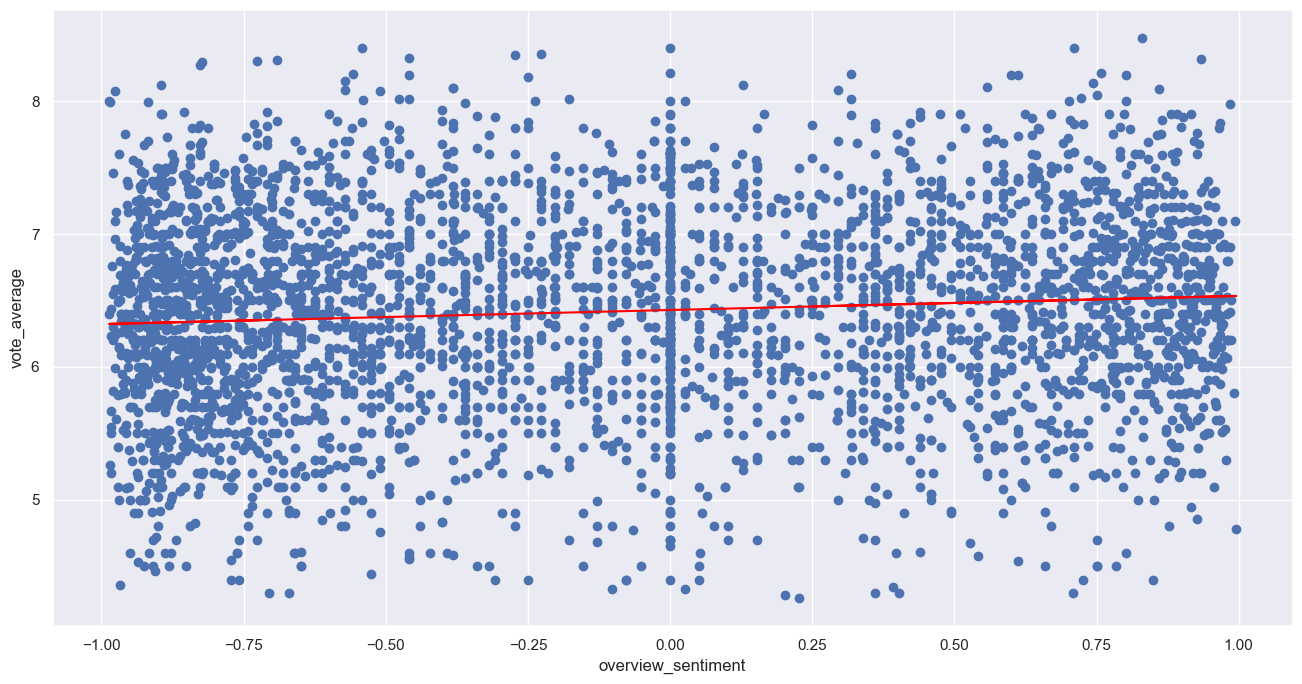

Intercept 	: b =  [6.3182597]
Coefficients 	: a =  [[0.00595336]]
R^2 0.005877561958677613


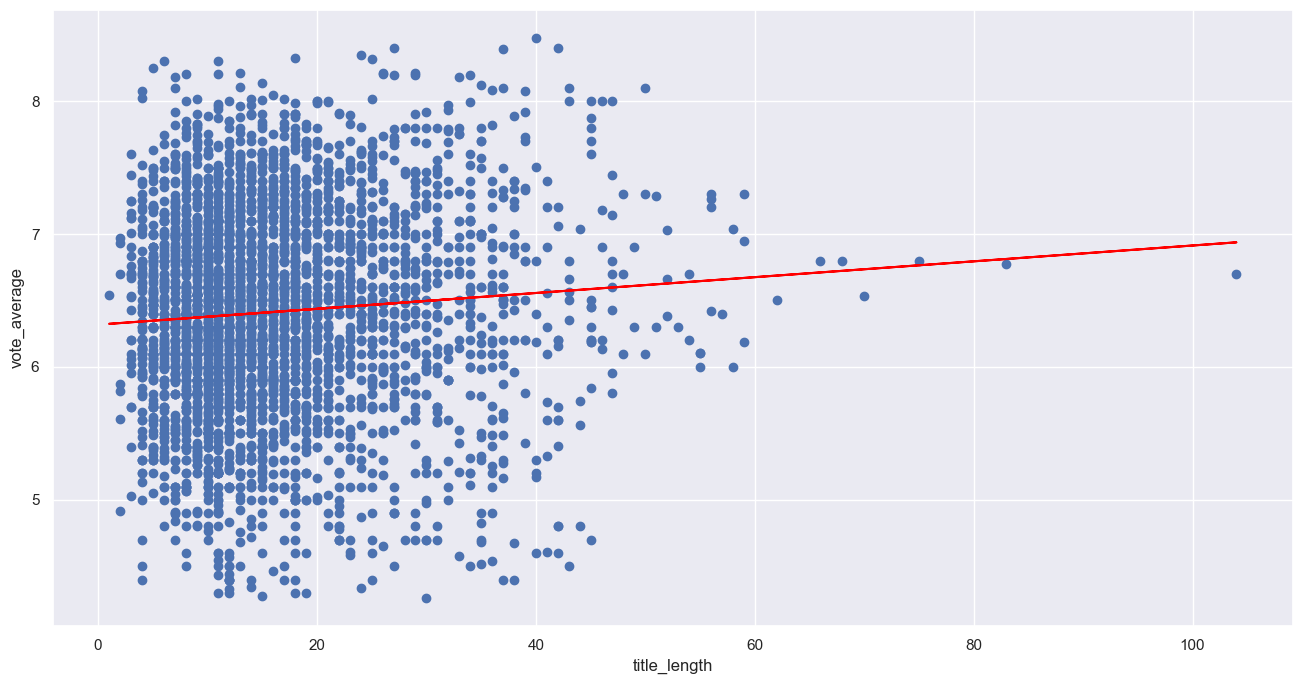

Intercept 	: b =  [6.35274883]
Coefficients 	: a =  [[0.02692445]]
R^2 0.004030234521515741


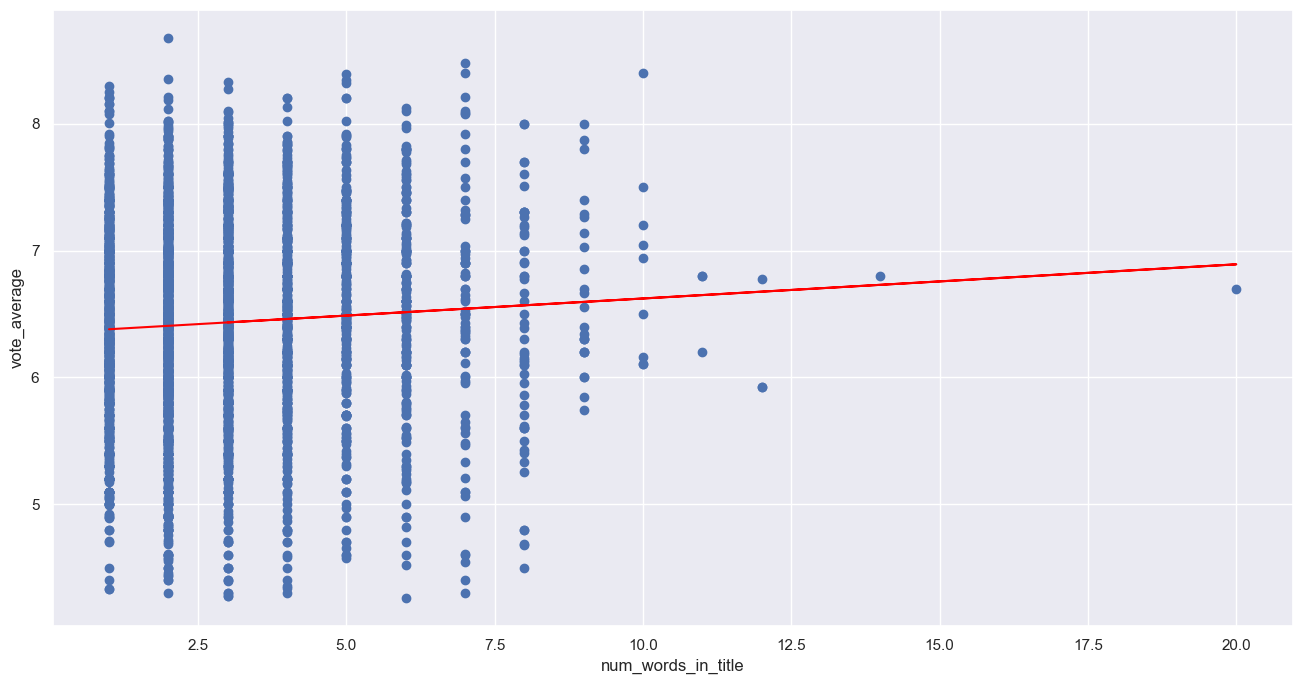

Intercept 	: b =  [6.48556152]
Coefficients 	: a =  [[-0.01077081]]
R^2 0.000665729483225963


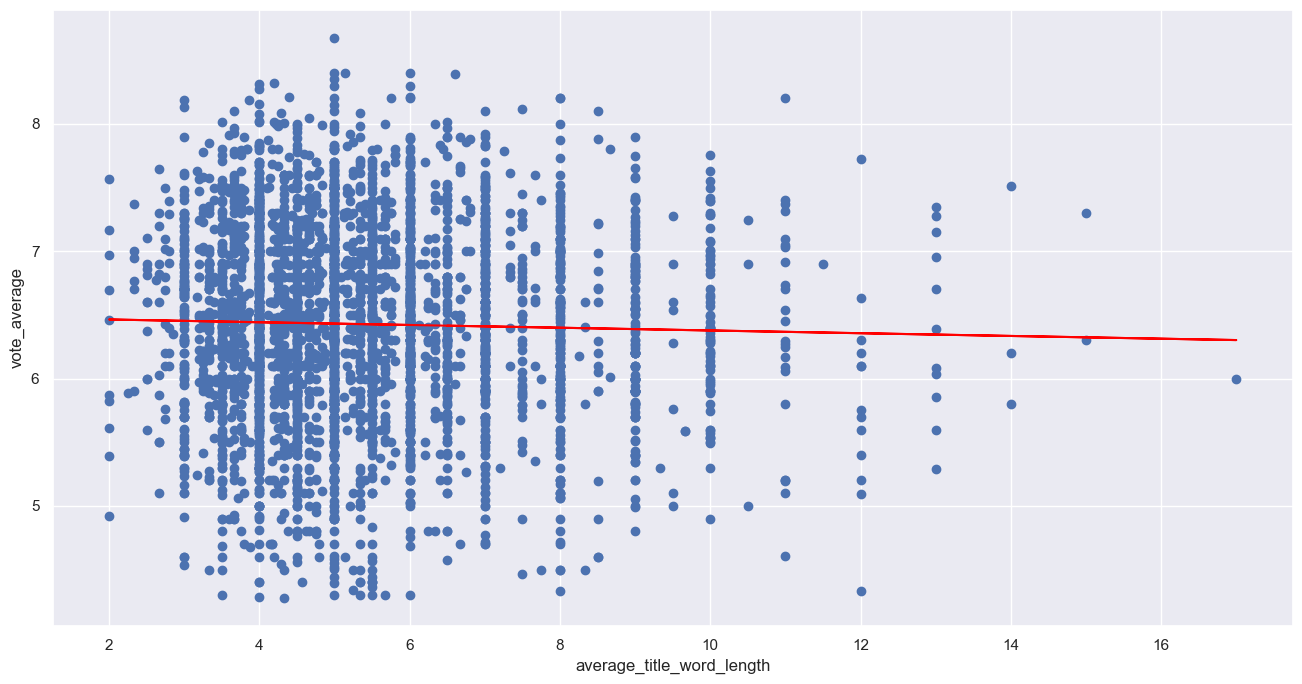

Intercept 	: b =  [6.40993034]
Coefficients 	: a =  [[0.08204021]]
R^2 0.001983624692689201


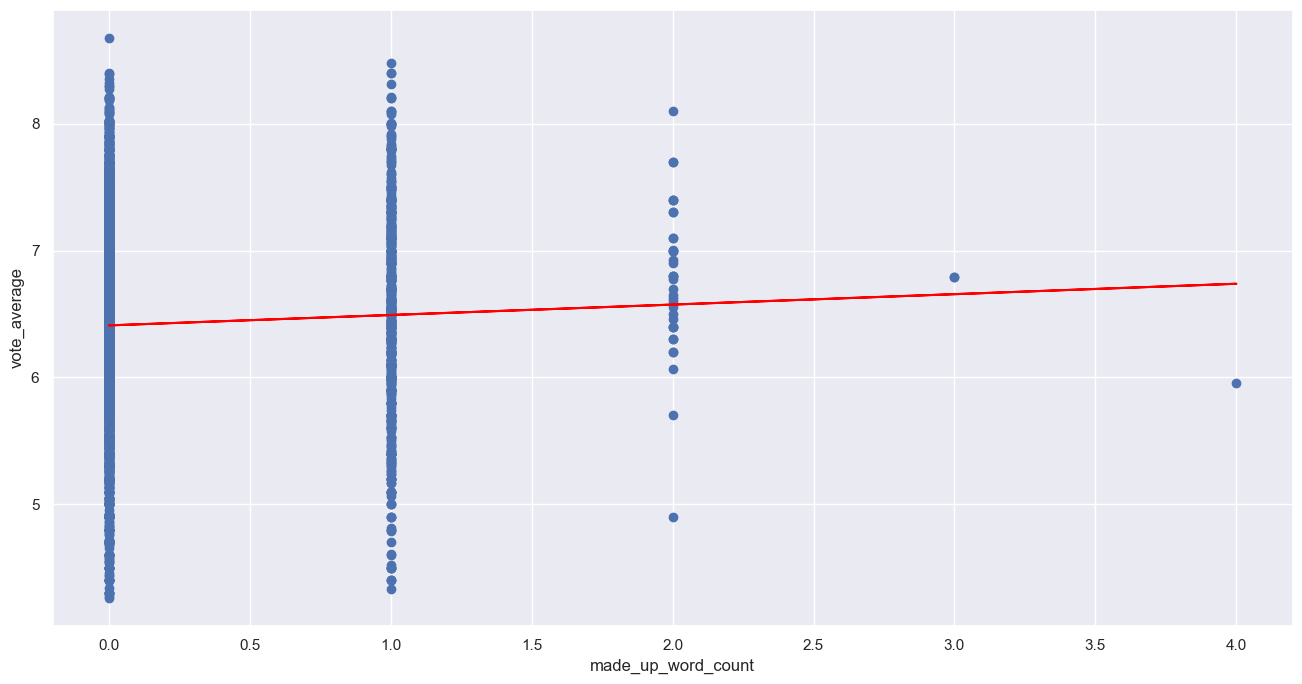

In [3]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [20.93137809]
Coefficients 	: a =  [[-0.13907362]]
R^2 3.563821627172725e-05


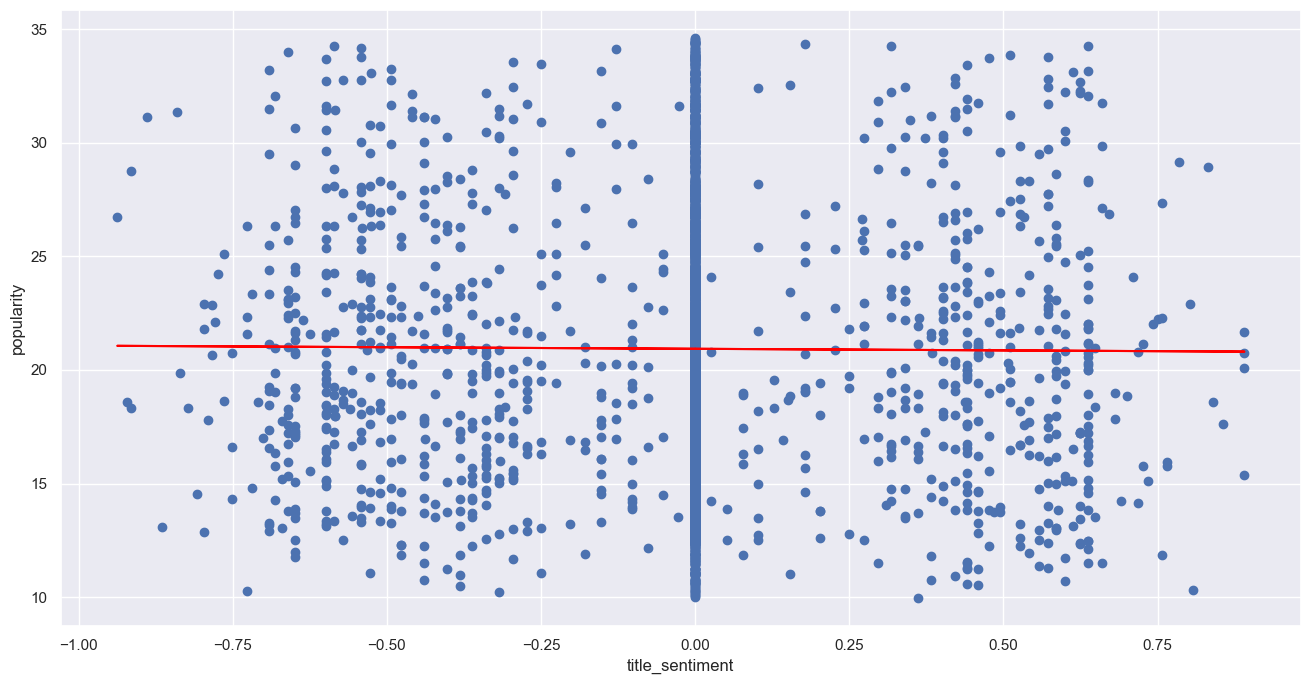

Intercept 	: b =  [21.00640917]
Coefficients 	: a =  [[-0.20223161]]
R^2 0.0004833368414911554


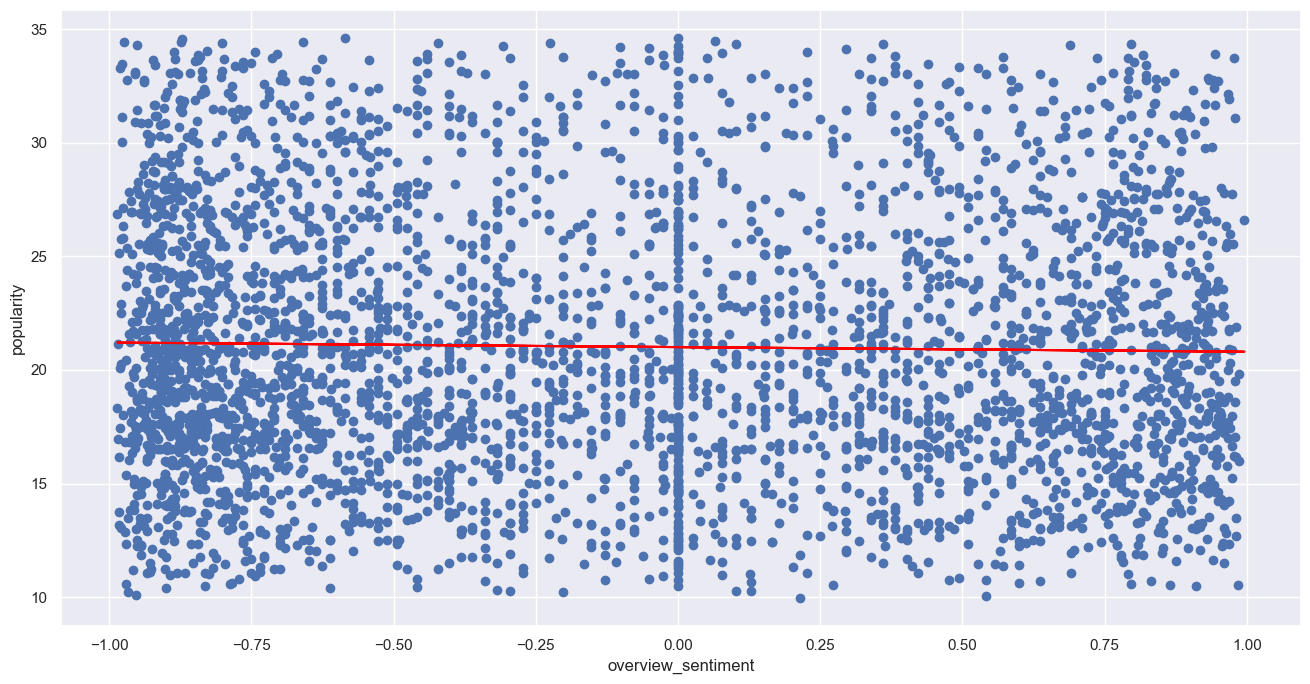

Intercept 	: b =  [21.12514664]
Coefficients 	: a =  [[-0.01108474]]
R^2 0.00033474348327211523


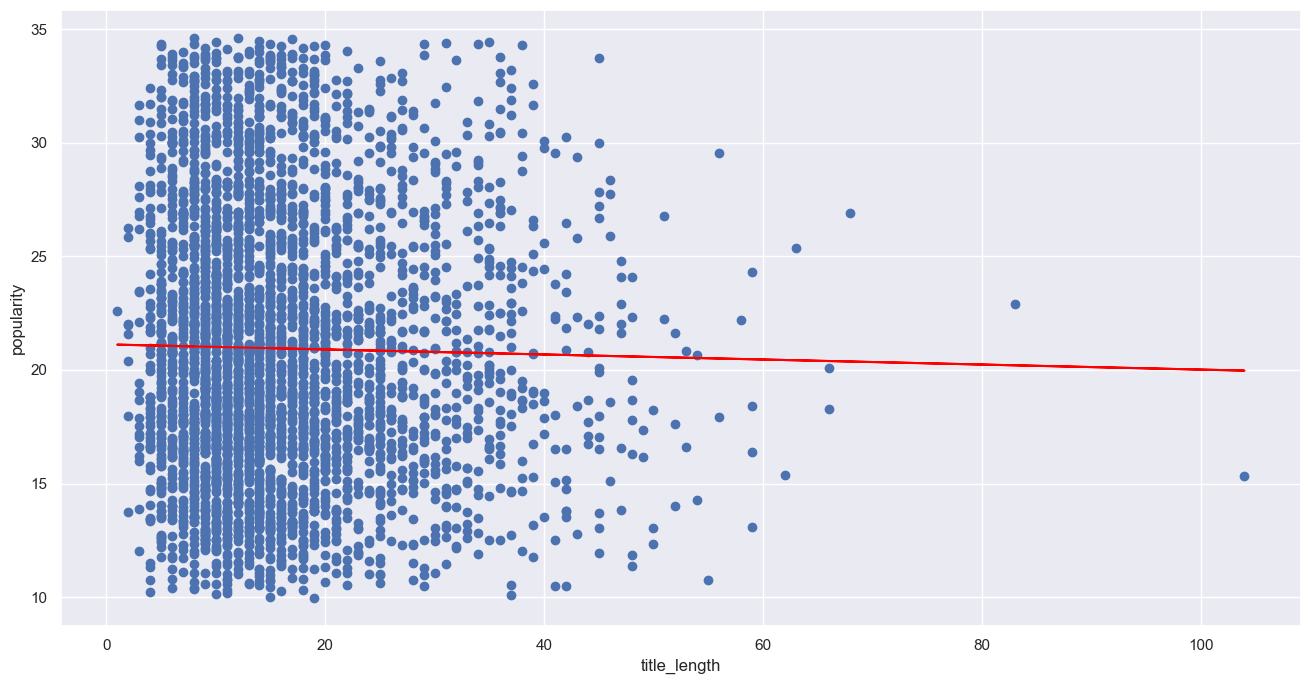

Intercept 	: b =  [21.04160673]
Coefficients 	: a =  [[-0.00346674]]
R^2 1.1635105736651496e-06


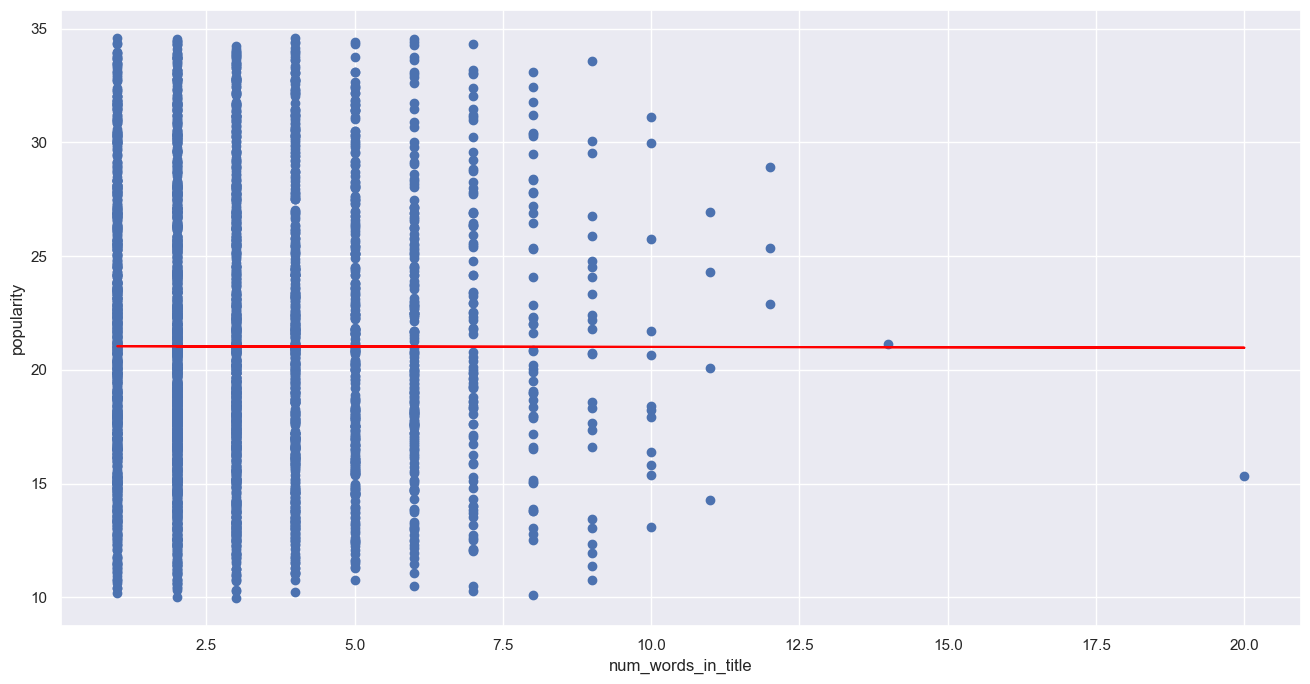

Intercept 	: b =  [20.70315218]
Coefficients 	: a =  [[0.04483261]]
R^2 0.00020339221714160693


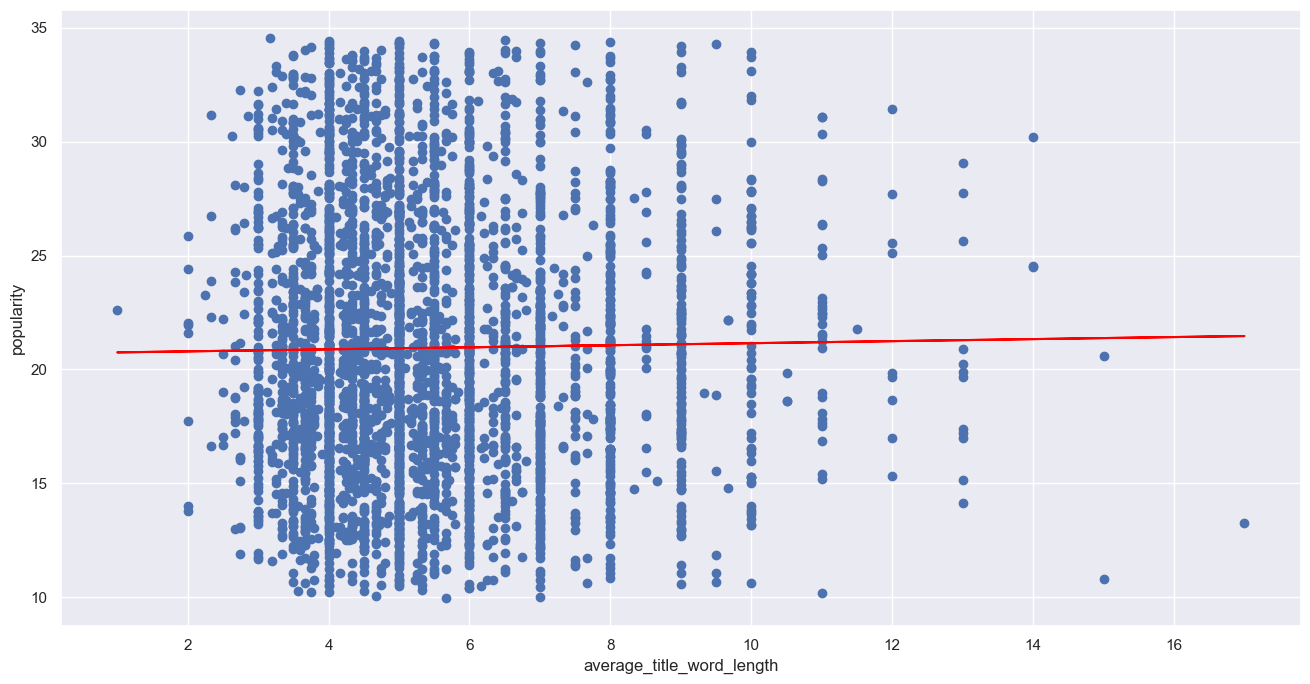

Intercept 	: b =  [20.96736315]
Coefficients 	: a =  [[0.30847867]]
R^2 0.0004916554421928732


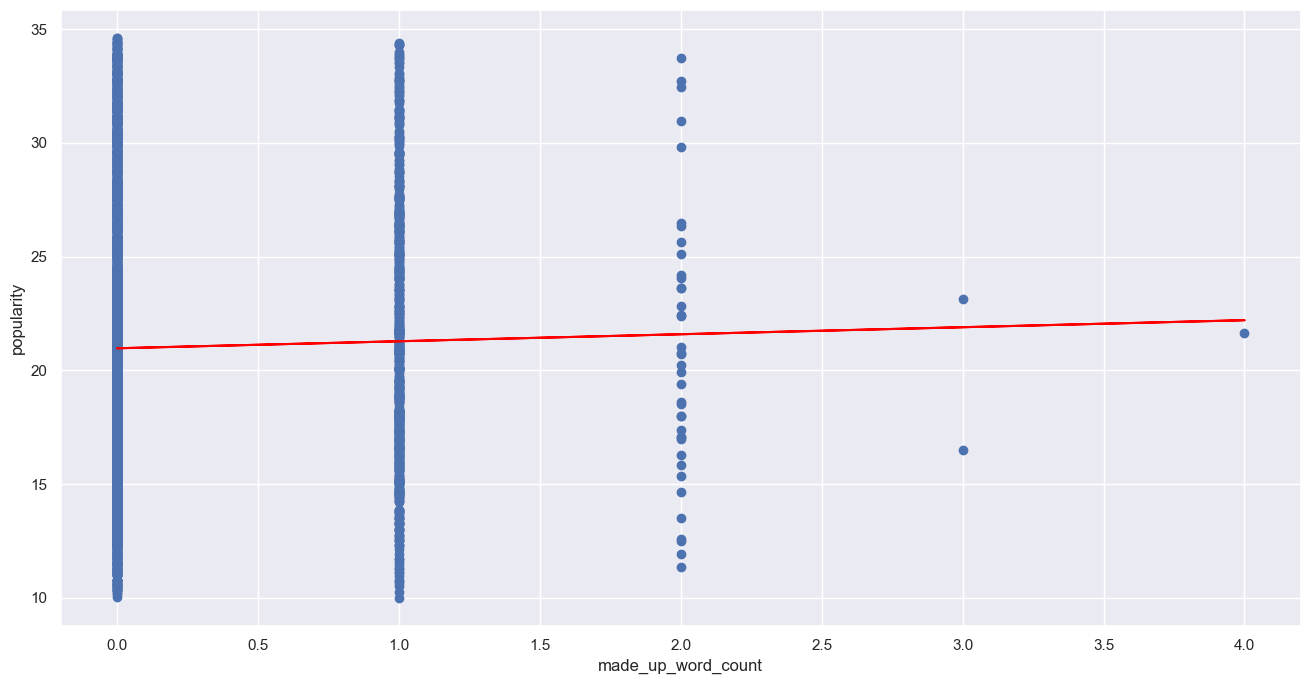

In [4]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

# Random Forest Regressor

## Vote Average

vote_average vs. title_sentiment with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.34361983368540217
Mean Squared Error (MSE) 	: 0.04055461198760906

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.23511200811955013
Mean Squared Error (MSE) 	: 0.06927527486939494



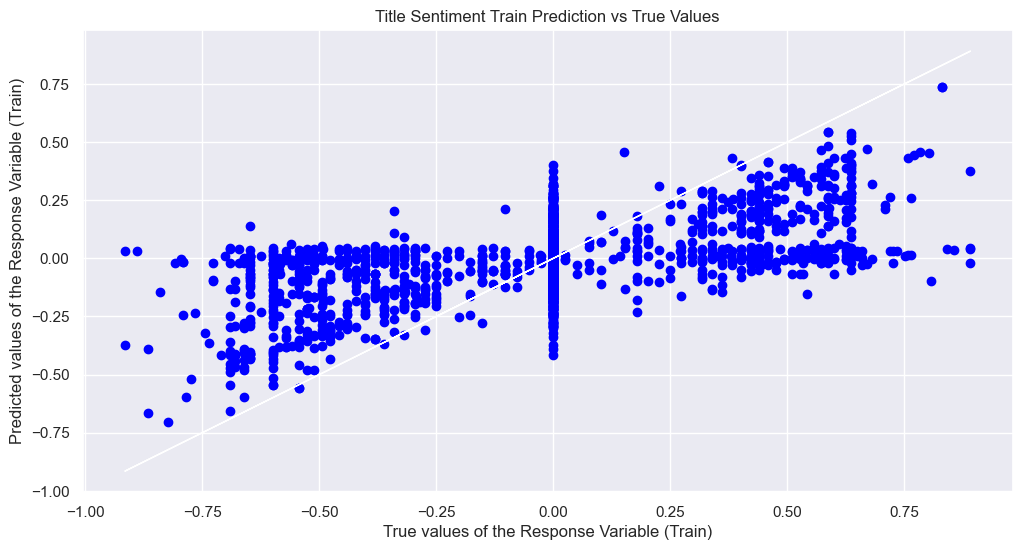

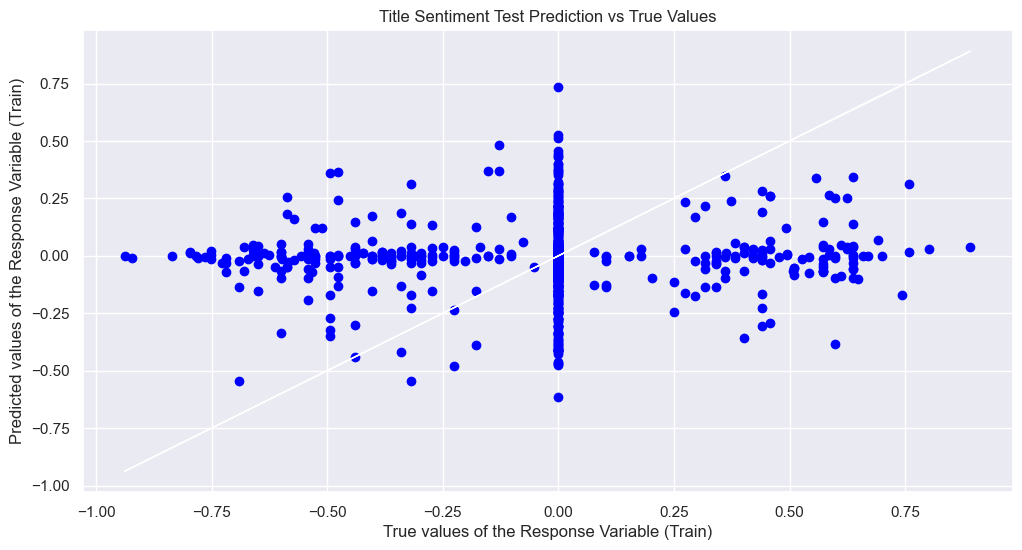

vote_average vs. overview_sentiment with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.35115019035383876
Mean Squared Error (MSE) 	: 0.2572699343849475

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.23163374636156564
Mean Squared Error (MSE) 	: 0.48626963689014696



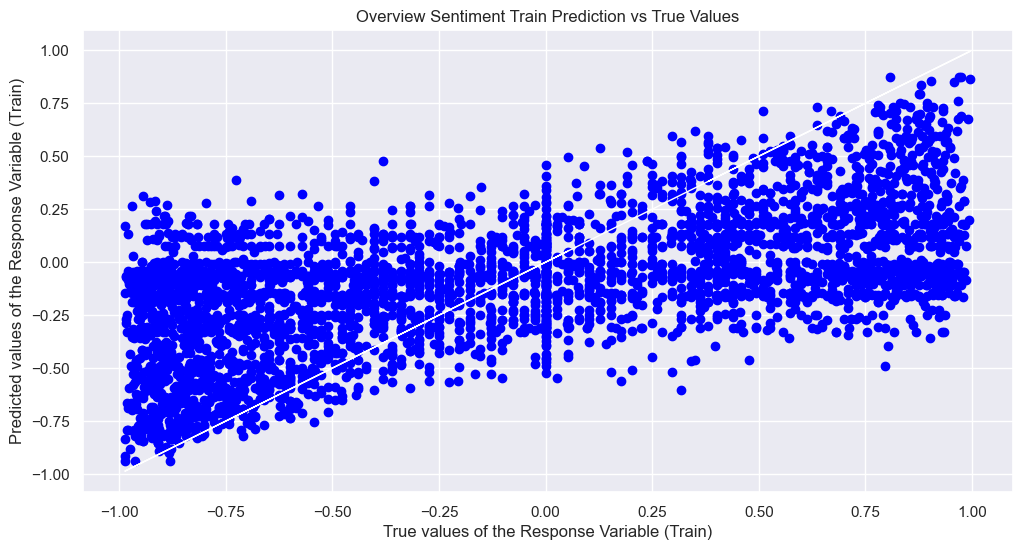

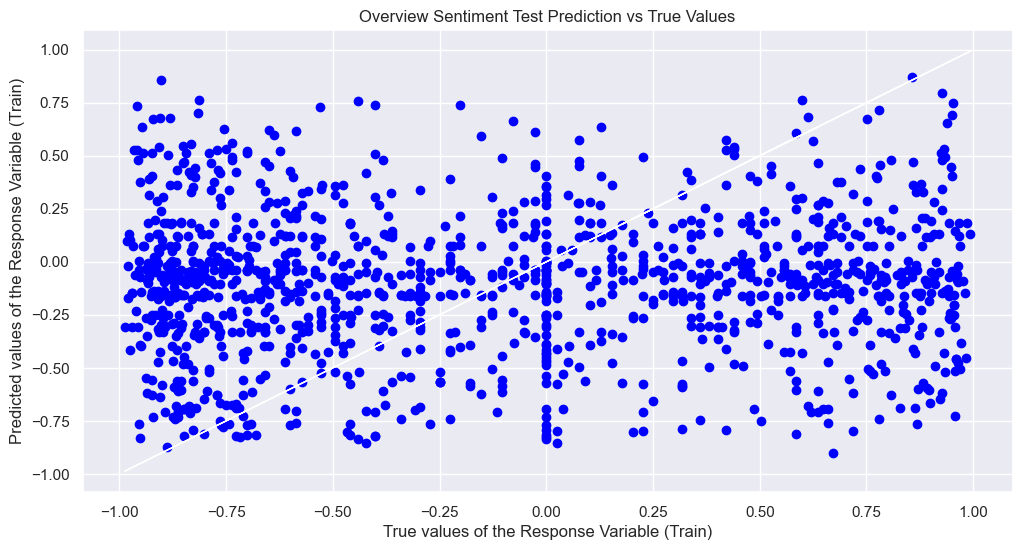

vote_average vs. title_length with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3530627661148129
Mean Squared Error (MSE) 	: 57.780153785510095

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.13808424167749167
Mean Squared Error (MSE) 	: 114.94550977283772



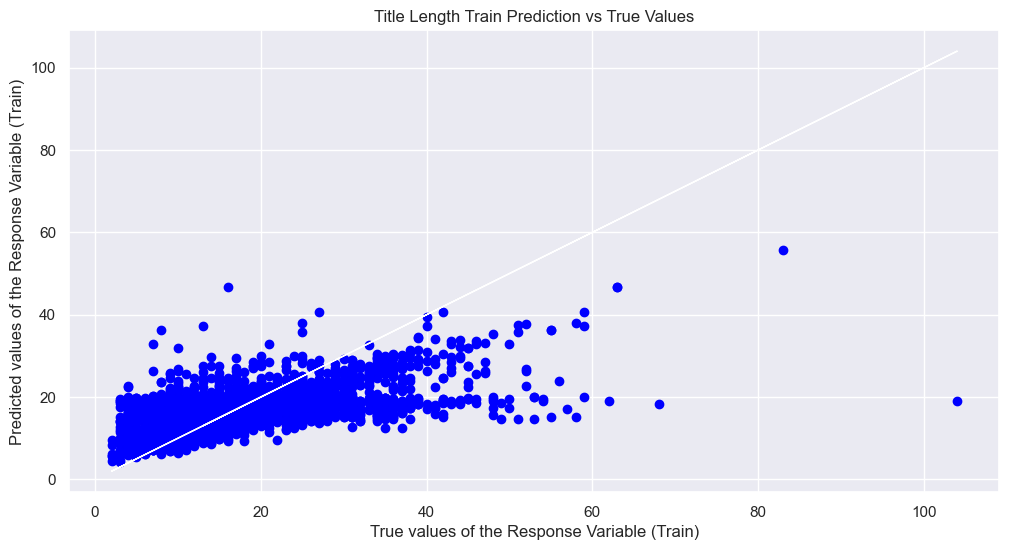

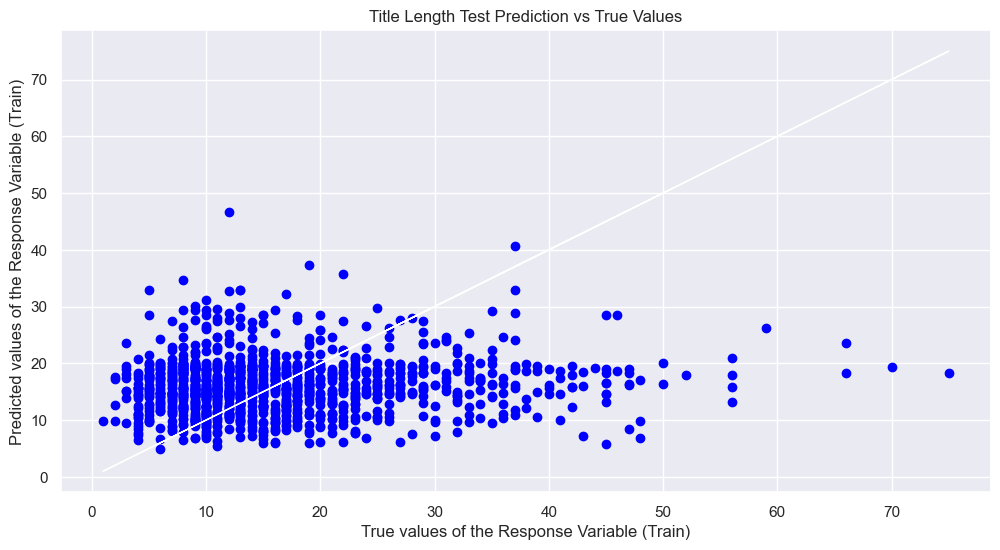

vote_average vs. num_words_in_title with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.33616405388265935
Mean Squared Error (MSE) 	: 2.0974123381247756

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.13503173567148363
Mean Squared Error (MSE) 	: 3.462109225702715



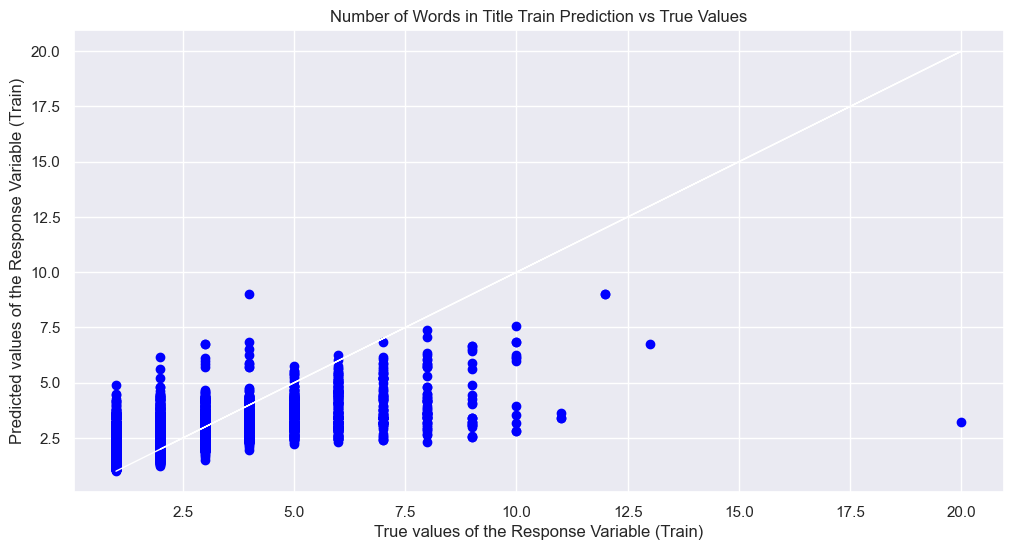

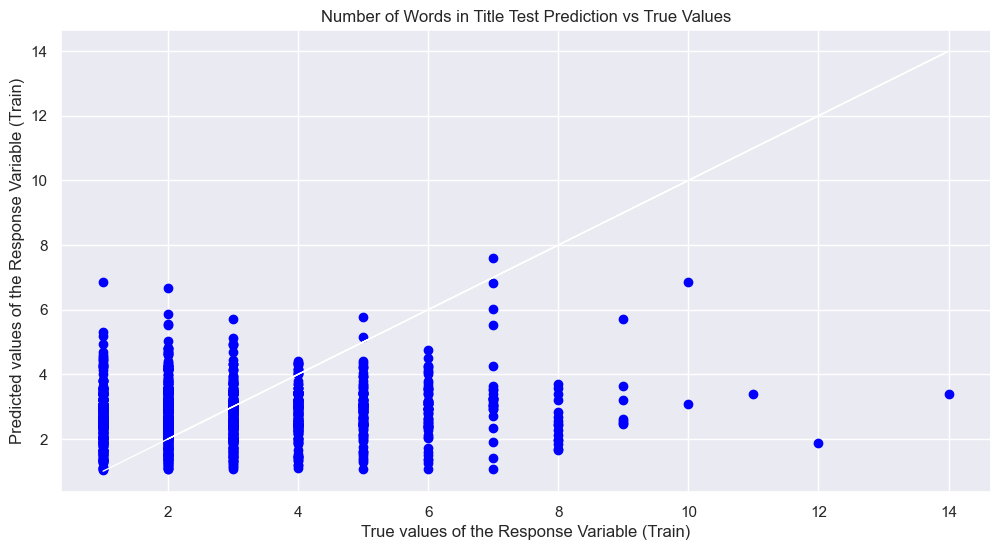

vote_average vs. average_title_word_length with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3719449096681313
Mean Squared Error (MSE) 	: 2.032727246943291

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.2537700433870782
Mean Squared Error (MSE) 	: 4.203404929334136



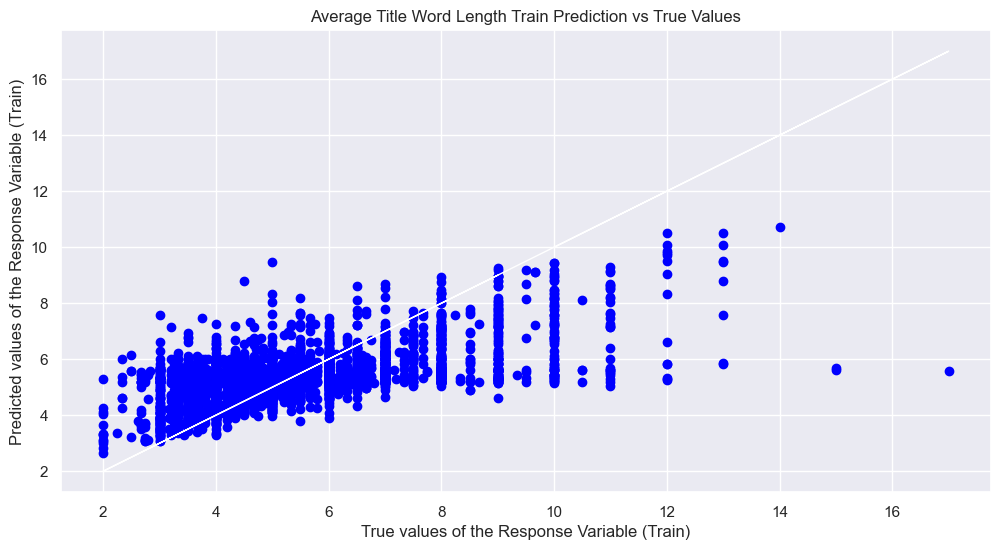

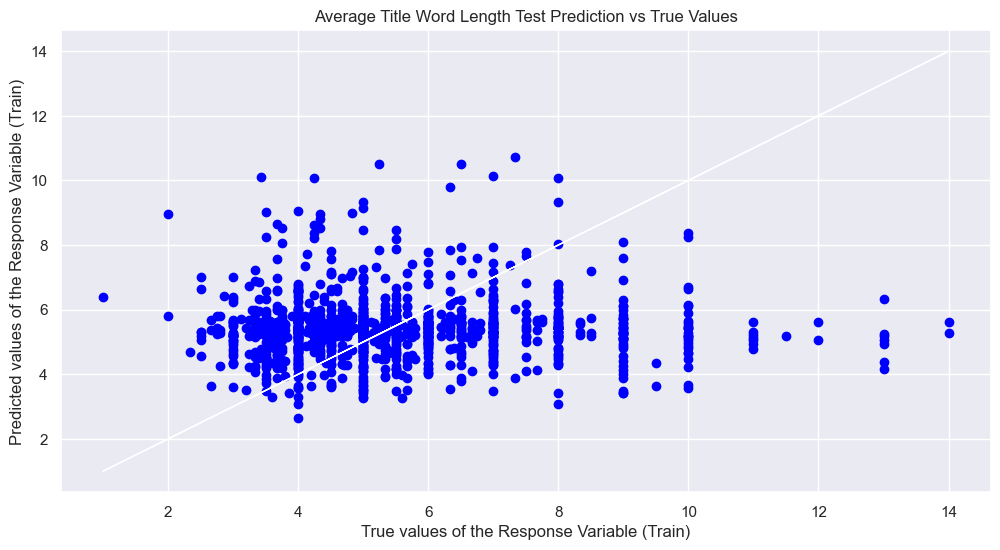

In [48]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "vote_average", "title_sentiment", 150, 80)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Title Sentiment Train Prediction vs True Values")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Title Sentiment Test Prediction vs True Values")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "vote_average", "overview_sentiment", 150, 80)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Overview Sentiment Train Prediction vs True Values")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Overview Sentiment Test Prediction vs True Values")

title_length_random_forest = generateRandomForestRegressor(data, "vote_average", "title_length", 150, 80)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Title Length Train Prediction vs True Values")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Title Length Test Prediction vs True Values")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "vote_average", "num_words_in_title", 150, 80)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Number of Words in Title Train Prediction vs True Values")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Number of Words in Title Test Prediction vs True Values")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "vote_average", "average_title_word_length", 150, 80)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Average Title Word Length Train Prediction vs True Values")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Average Title Word Length Test Prediction vs True Values")

## Popularity

popularity vs. title_sentiment with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7465150905589485
Mean Squared Error (MSE) 	: 0.015457996928353049

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.5214250337067867
Mean Squared Error (MSE) 	: 0.08915460875429754



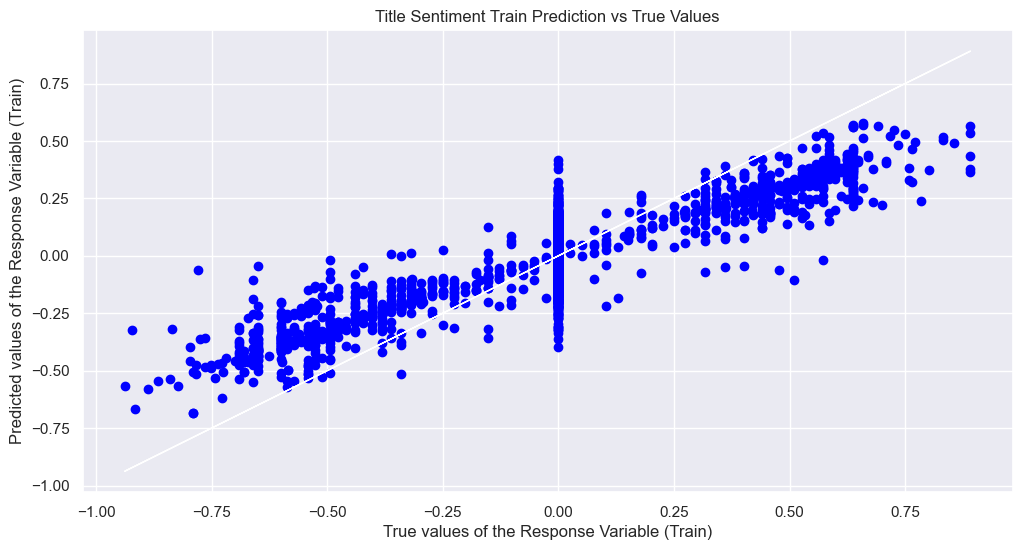

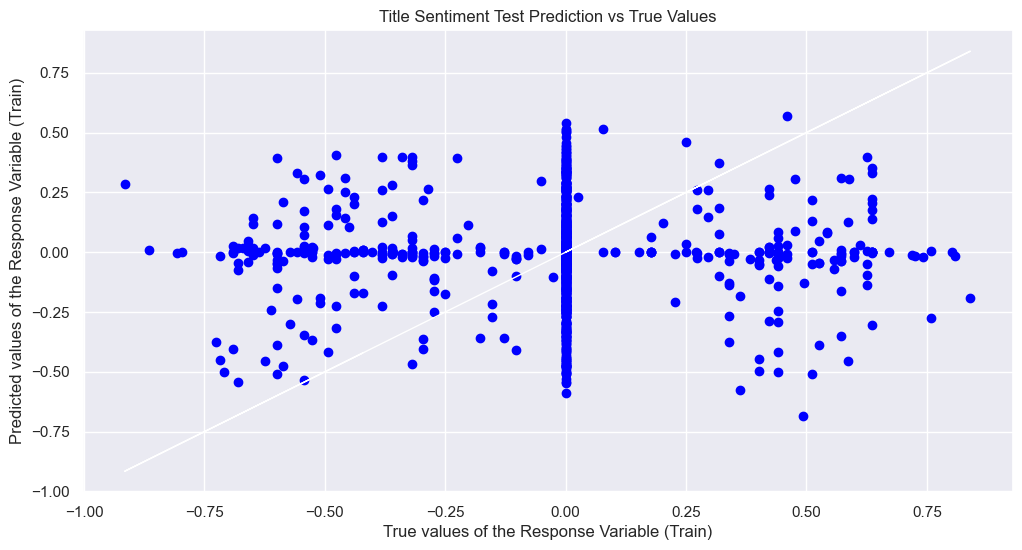

popularity vs. overview_sentiment with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7348651564020854
Mean Squared Error (MSE) 	: 0.10634814593825172

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.4642579656053065
Mean Squared Error (MSE) 	: 0.5585567091169603



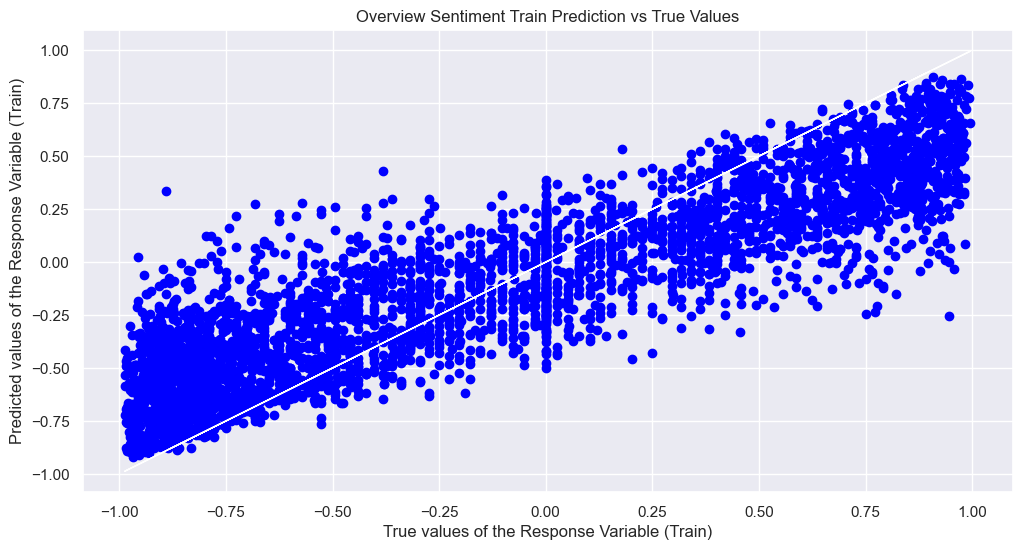

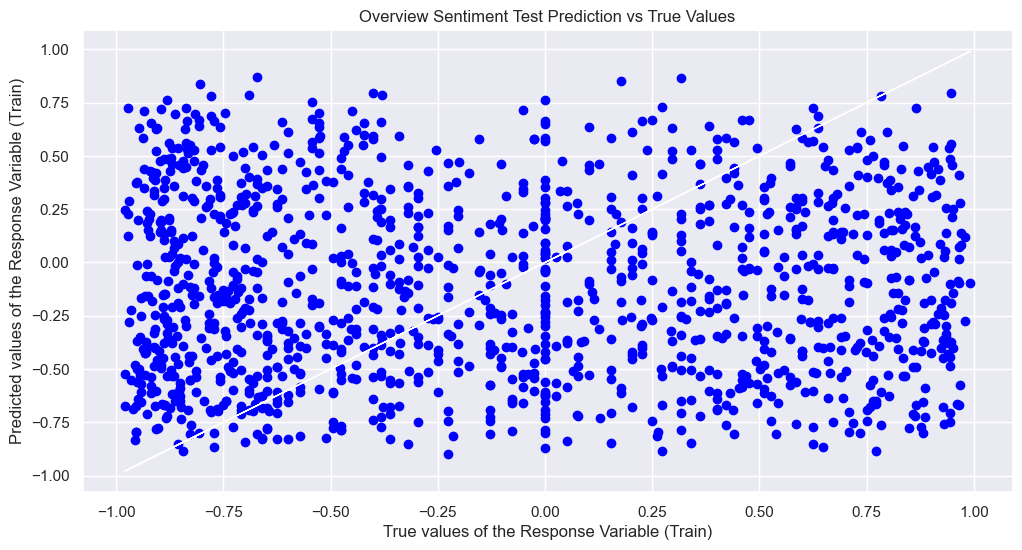

popularity vs. title_length with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7444764732894658
Mean Squared Error (MSE) 	: 23.753745390460224

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.4814186615737468
Mean Squared Error (MSE) 	: 133.4108378762424



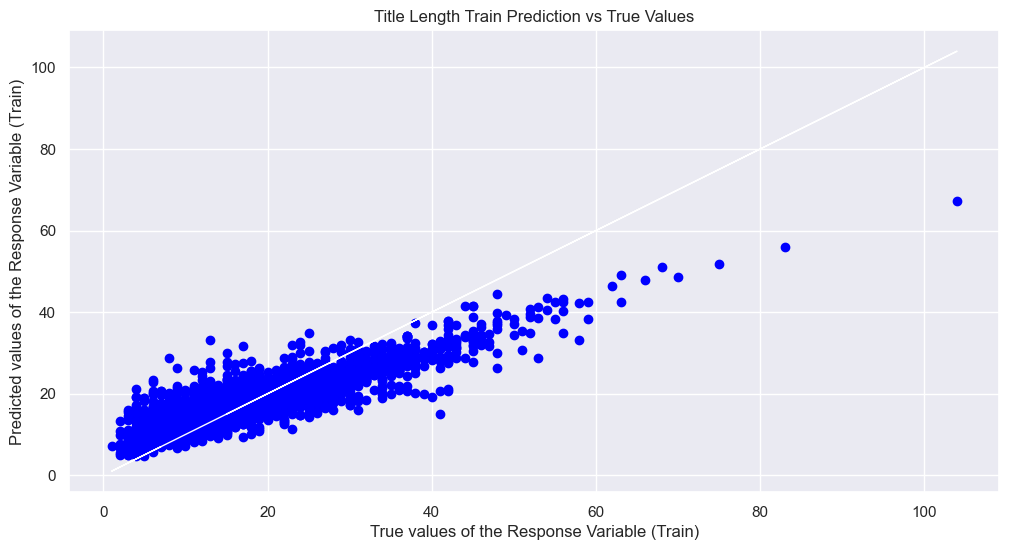

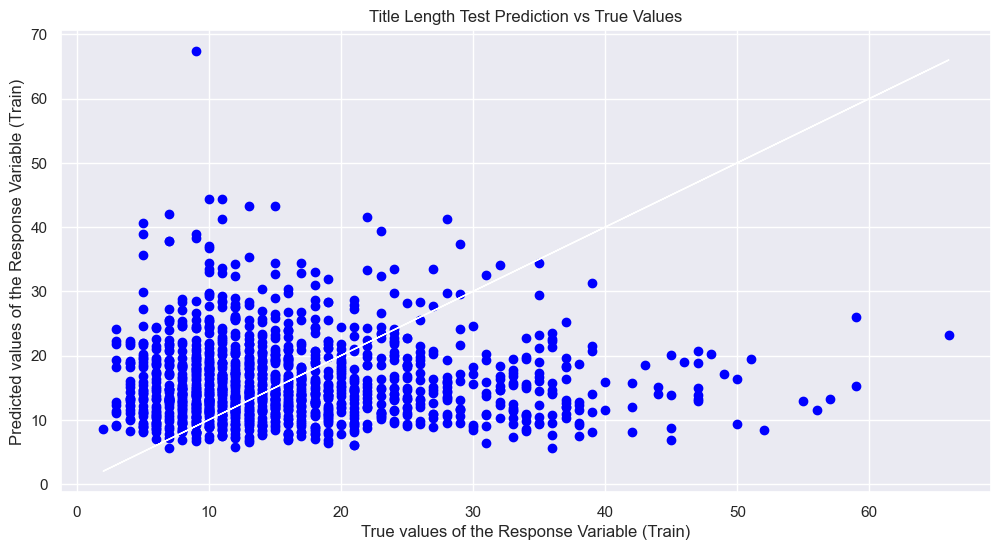

popularity vs. num_words_in_title with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7359934358356107
Mean Squared Error (MSE) 	: 0.8332024180626572

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.4671197945187513
Mean Squared Error (MSE) 	: 4.492031539216633



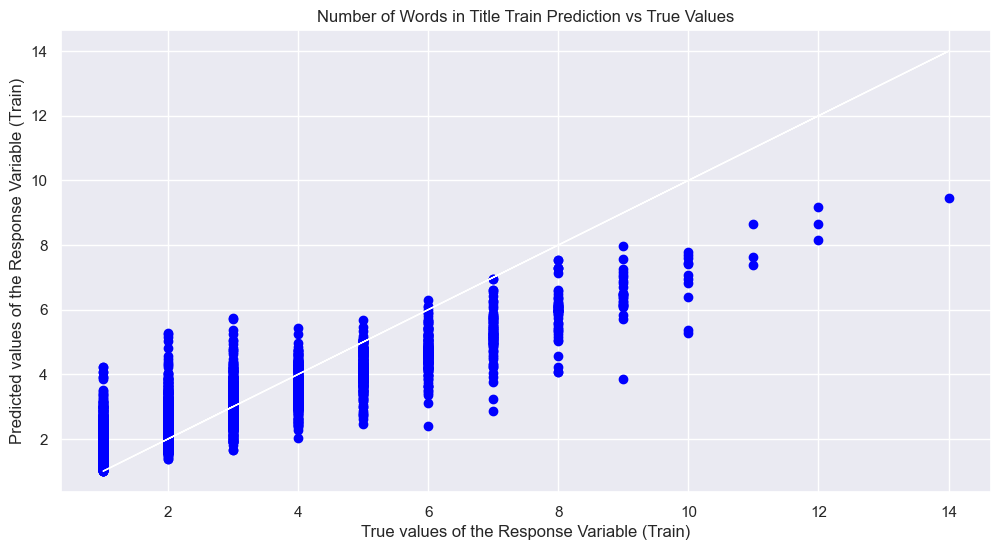

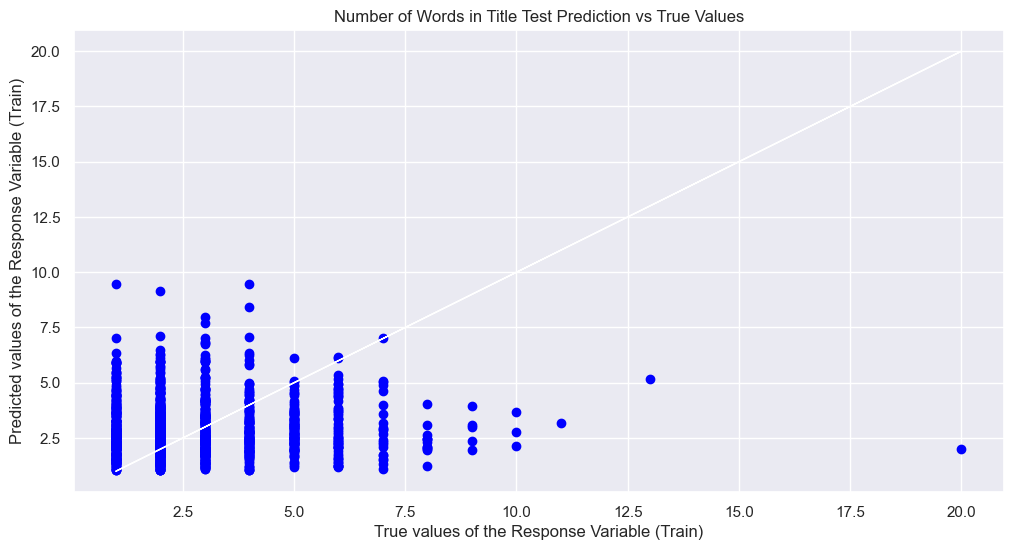

popularity vs. average_title_word_length with depth 80
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7403800084762118
Mean Squared Error (MSE) 	: 0.8414938750904416

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.4356396860495273
Mean Squared Error (MSE) 	: 4.7937218338497285



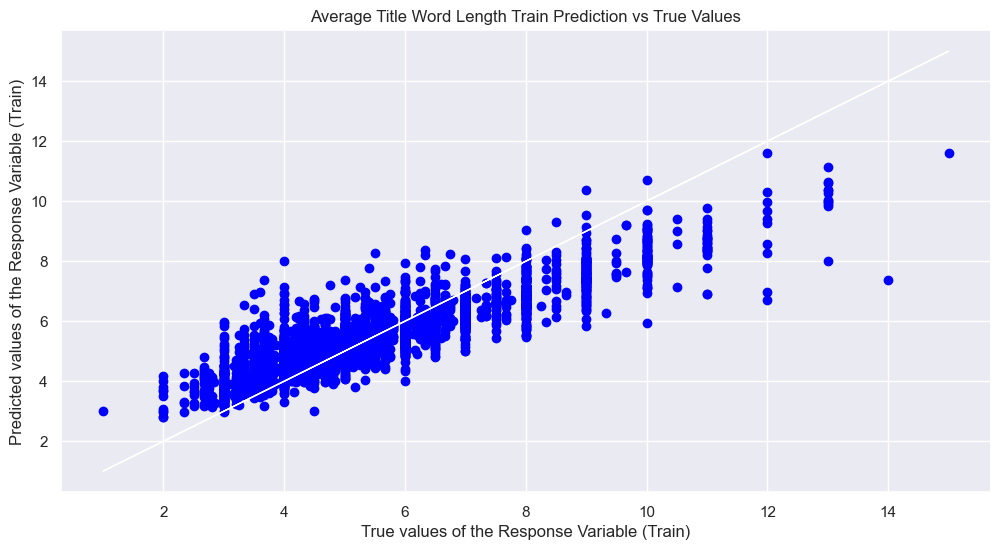

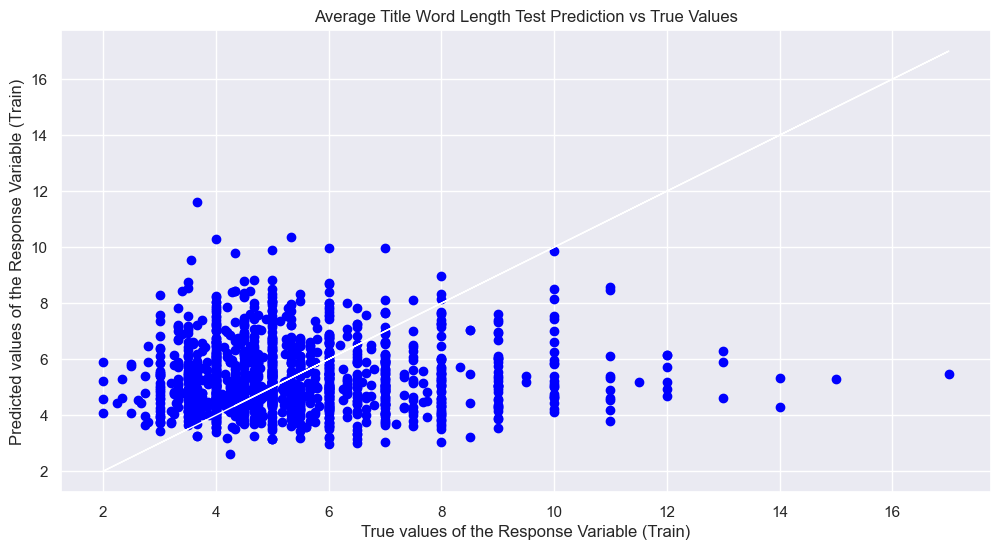

In [49]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "popularity", "title_sentiment", 150, 80)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Title Sentiment Train Prediction vs True Values")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Title Sentiment Test Prediction vs True Values")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "popularity", "overview_sentiment", 150, 80)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Overview Sentiment Train Prediction vs True Values")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Overview Sentiment Test Prediction vs True Values")

title_length_random_forest = generateRandomForestRegressor(data, "popularity", "title_length", 150, 80)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Title Length Train Prediction vs True Values")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Title Length Test Prediction vs True Values")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "popularity", "num_words_in_title", 150, 80)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Number of Words in Title Train Prediction vs True Values")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Number of Words in Title Test Prediction vs True Values")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "popularity", "average_title_word_length", 150, 80)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Average Title Word Length Train Prediction vs True Values")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Average Title Word Length Test Prediction vs True Values")

# Classification Tree

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8775457592162929
Test Classification Accuracy 	: 0.888631090487239
Train Confusion Matrix
True Positive Rate: 0.28728414442700156
False Positive Rate: 0.006477483035163479
True Negative Rate: 0.9935225169648365
False Negative Rate: 0.7127158555729984
Test Confusion Matrix
True Positive Rate: 0.3598130841121495
False Positive Rate: 0.006487488415199258
True Negative Rate: 0.9935125115848007
False Negative Rate: 0.6401869158878505


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


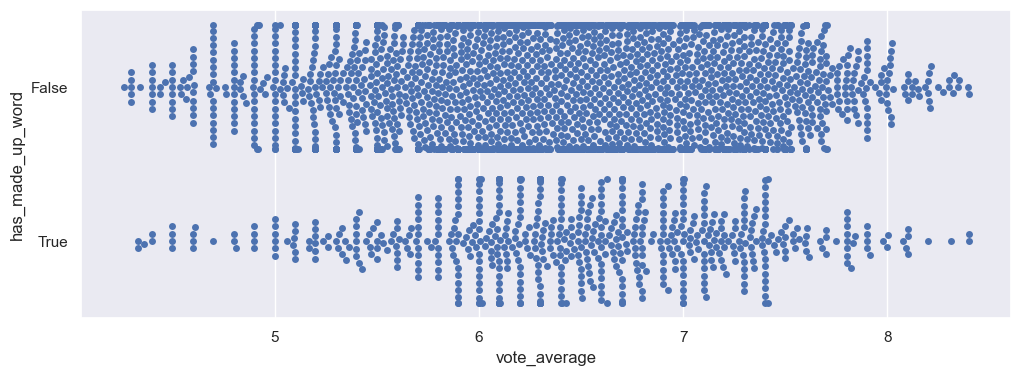

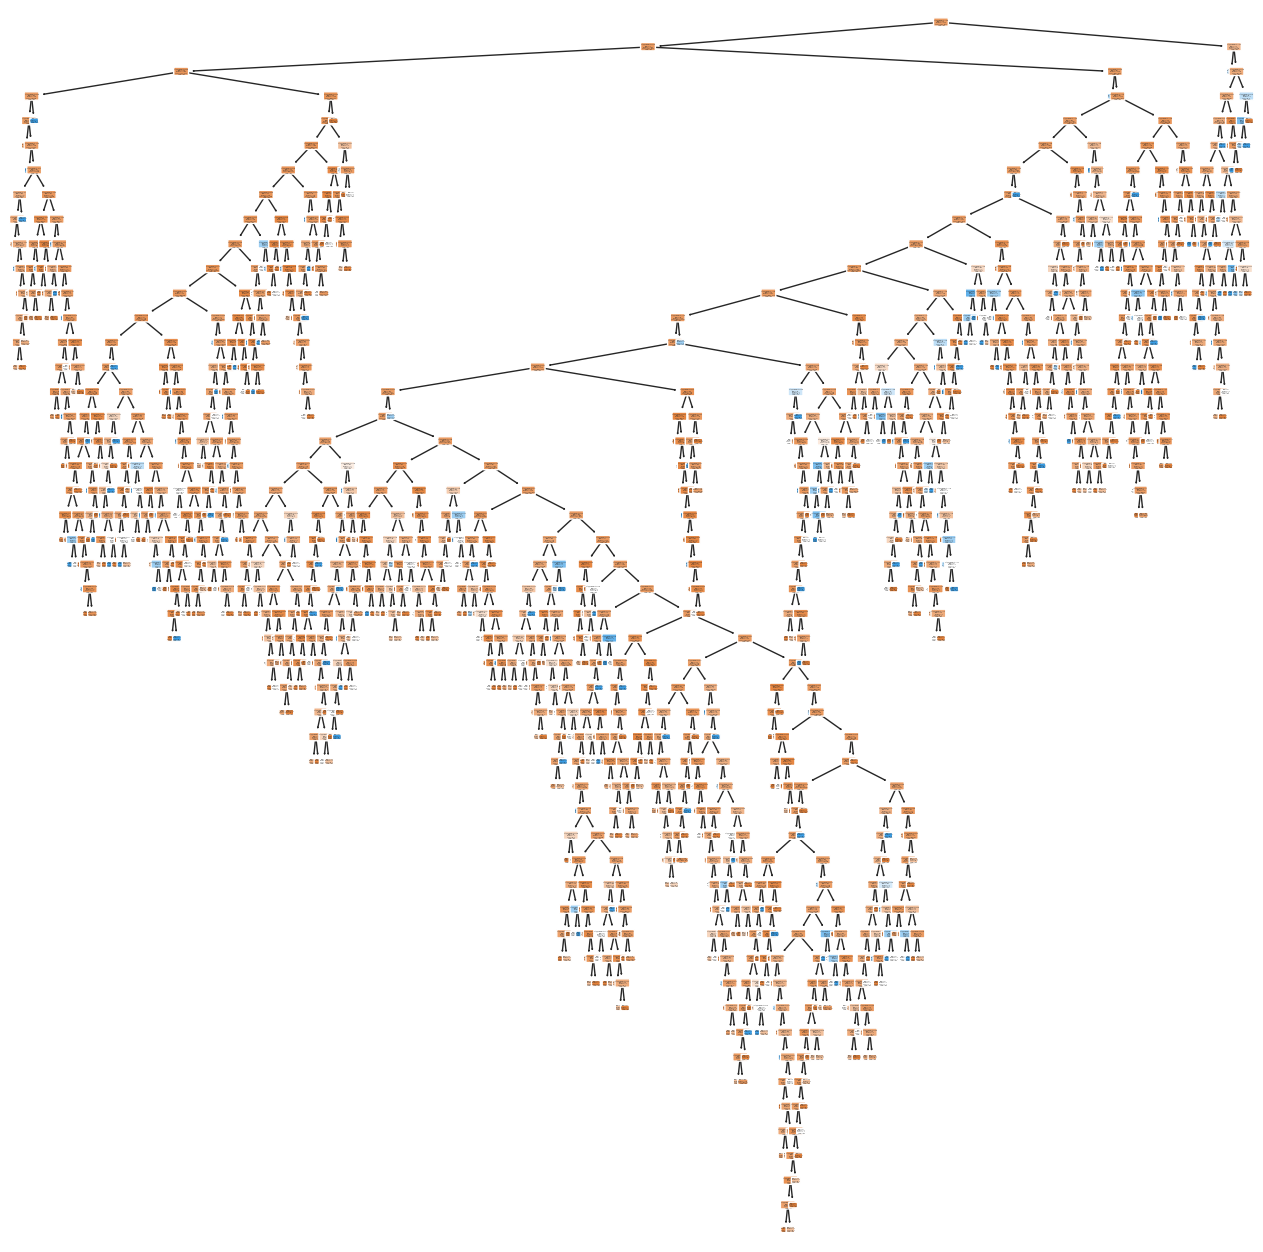

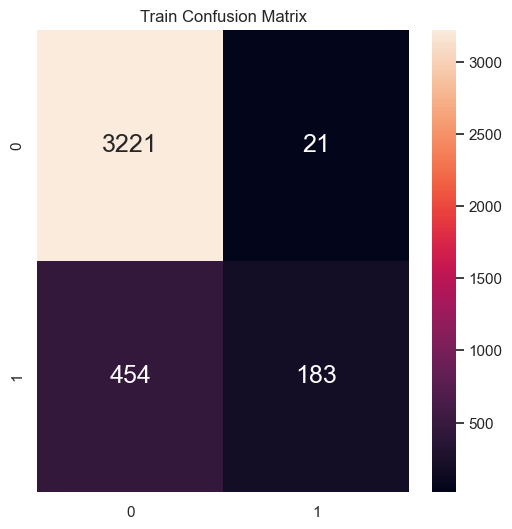

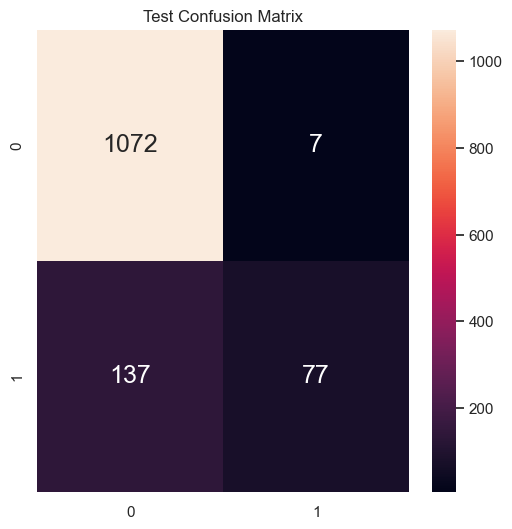

In [21]:
has_made_up_word_class_tree = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

# Random Forest Classifier

vote_average vs. has_made_up_word with depth 80
Train Classification Accuracy 	: 0.8878576952822892
Test Classification Accuracy 	: 0.8012374323279196
Train Confusion Matrix
True Positive Rate: 0.37715179968701096
False Positive Rate: 0.011419753086419753
True Negative Rate: 0.9885802469135803
False Negative Rate: 0.622848200312989
Test Confusion Matrix
True Positive Rate: 0.08962264150943396
False Positive Rate: 0.05920444033302498
True Negative Rate: 0.940795559666975
False Negative Rate: 0.910377358490566


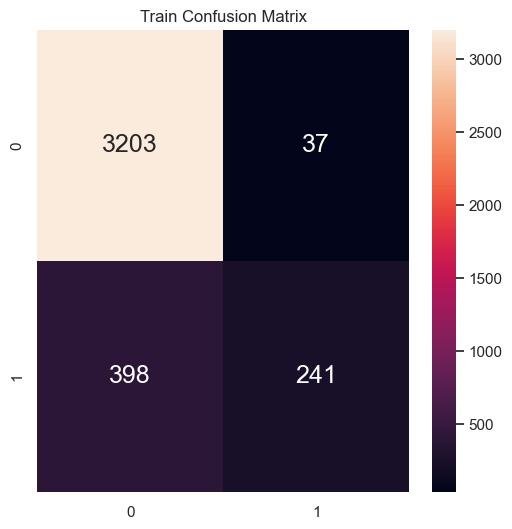

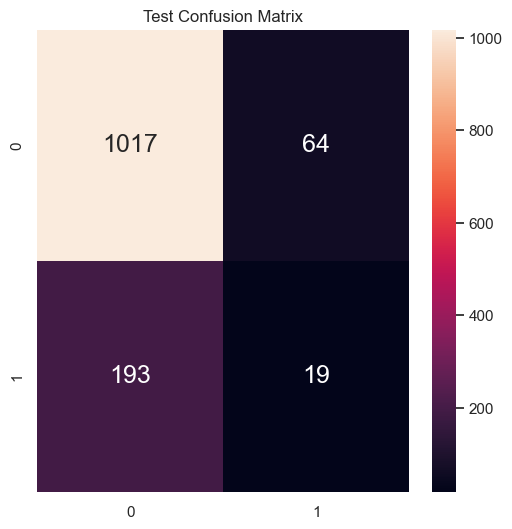

In [24]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "vote_average", "has_made_up_word", 150, 80)
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")